In [ ]:
import gensim
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

In [48]:
my_vocab = ['apple','orange','shimla','banana','maruti','mumbai','china','india','husband'
            ,'wife','brother','sister','red','yellow','computer','mobile','pear','guava']
len(my_vocab)

18

In [49]:
"""model_path = "glove_model"
glove_model.save(model_path)"""

In [50]:
glove_model.most_similar('love',topn=10)

[('loves', 0.6420262455940247),
 ('passion', 0.6261469125747681),
 ('loved', 0.595270574092865),
 ('romantic', 0.5921086072921753),
 ('lovers', 0.5904366970062256),
 ('lover', 0.5841912627220154),
 ('you', 0.5837852954864502),
 ('me', 0.5835772752761841),
 ('affection', 0.581821858882904),
 ('always', 0.5701122283935547)]

In [51]:
# husband - man + woman = wife

In [52]:
glove_model.most_similar(positive= ['woman', 'husband'], negative=['man'],topn=3)

[('wife', 0.7732622027397156),
 ('mother', 0.7195996046066284),
 ('daughter', 0.6967028379440308)]

In [63]:
words = []
vectors = []

for word in my_vocab:
    words.append(word)
    vectors.append(glove_model[word])

vectors_array = np.array(vectors)
print(vectors_array[0].shape)

(300,)


In [64]:
dicts = zip(words,vectors)

pd.DataFrame.from_dict(dicts)

,0,1
0,apple,"[-0.20842, -0.019668, 0.063981, -0.71403, -0.2..."
1,orange,"[-0.24776, -0.12359, 0.20986, -0.15834, -0.158..."
2,shimla,"[-0.083216, -0.235, 0.34561, 0.082819, 0.41372..."
3,banana,"[0.42141, 0.020467, 0.12666, 0.39762, -0.11016..."
4,maruti,"[-0.097778, 0.39619, -0.1984, 0.12019, 0.47573..."
5,mumbai,"[-0.25335, -0.41384, 0.15746, 0.23978, 0.09889..."
6,china,"[-0.11286, 0.033802, -0.2941, -0.75285, 0.0542..."
7,india,"[-0.11337, -0.57114, 0.070453, -0.36241, -0.05..."
8,husband,"[-0.2866, -0.32581, -0.051729, -0.21017, -0.03..."
9,wife,"[-0.62203, -0.091568, -0.45238, -0.45005, 0.12..."


In [65]:
dim_model = TSNE(n_components=2, perplexity=3, init='pca', random_state=45)
fit_model = dim_model.fit_transform(vectors_array)

In [66]:
fit_model

array([[ 3.6855333e+00,  2.0465258e+01],
       [ 1.8119772e+01, -6.2651241e+01],
       [ 5.3032837e+01, -6.6119760e-02],
       [ 1.0946297e+01,  3.4961132e+01],
       [ 6.1068363e+01, -1.7654331e+01],
       [ 4.9868042e+01, -8.2426996e+00],
       [ 4.4246586e+01, -2.1651392e+01],
       [ 4.9913738e+01, -1.5310020e+01],
       [-1.6391689e+01, -3.7068909e+01],
       [-1.5937251e+01, -3.0278357e+01],
       [-2.4906244e+01, -3.4887527e+01],
       [-7.9130182e+00, -2.9896429e+01],
       [ 8.2344666e+00, -7.0003899e+01],
       [ 1.4667891e+01, -6.9354698e+01],
       [ 3.1475229e+00,  1.2809575e+01],
       [ 3.3375921e+00,  5.4183140e+00],
       [ 7.6263763e-02,  3.8358200e+01],
       [ 7.4306898e+00,  4.0926601e+01]], dtype=float32)

In [67]:
x = []
y = []

for i in fit_model:
    x.append(i[0])
    y.append(i[1])

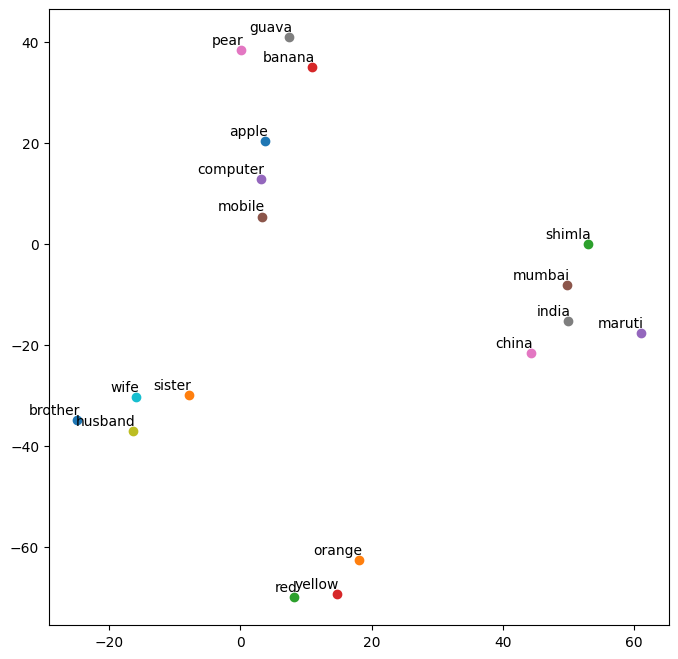

In [68]:
plt.figure(figsize=(8,8))

for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(words[i], xy=(x[i],y[i]),
                 xytext=(2, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom'
                )